<a href="https://colab.research.google.com/github/mansigDS/Assignments/blob/master/MNSIT_FASHION_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense,Dropout,Flatten,Conv2D,MaxPooling2D


In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [26]:
x_train=np.array(x_train).reshape(-1,784)/255
x_test=np.array(x_test).reshape(-1,784)/255
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


In [0]:
onehot=OneHotEncoder()
onehot.fit(y_train)
y_train=onehot.transform(y_train).toarray()
y_test=onehot.transform(y_test).toarray()

In [36]:
x_train=x_train.reshape(60000,  28, 28,1).astype('float32')
x_test=x_test.reshape(10000, 28, 28,1).astype('float32')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [0]:
image=Input(shape=(28,28,1))
conv1=Conv2D(32,(3,3),padding='same', activation='relu')(image)
pool1=MaxPooling2D(pool_size=(2,2))(conv1)

conv2=Conv2D(64,(3,3),padding='same', activation='relu')(pool1)
pool2=MaxPooling2D(pool_size=(2,2))(conv2)

conv3=Conv2D(128,(3,3),padding='same', activation='relu')(pool2)
pool3=MaxPooling2D(pool_size=(2,2))(conv3)

flat=Flatten()(pool3)

dense1=Dense(2084, activation='relu')(flat)
drop1=Dropout(rate=0.2)(dense1)

dense2=Dense(1024, activation='relu')(drop1)
drop2=Dropout(rate=0.2)(dense2)

dense3=Dense(200, activation='relu')(drop2)
drop3=Dropout(rate=0.2)(dense3)

output=Dense(10,activation='softmax')(drop3)
model=Model(inputs=image, outputs=output)

In [38]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)         0   

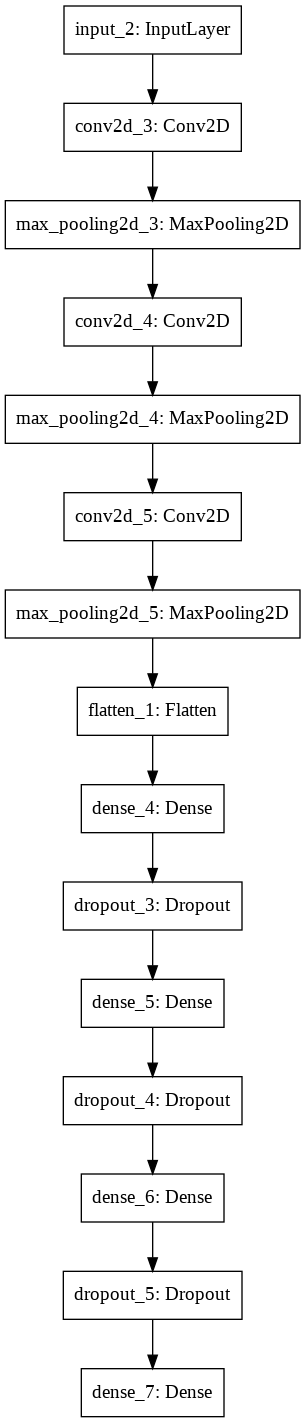

In [39]:
from tensorflow.keras.utils import plot_model
plot_model(model)


In [0]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [42]:
model.fit(x_train,y_train,validation_data=[x_test,y_test],
         epochs=50,batch_size=100,verbose=1)

Epoch 1/10
600/600 [==============================] - 140s 234ms/step - loss: 0.2689 - accuracy: 0.9013 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
600/600 [==============================] - 139s 232ms/step - loss: 0.2313 - accuracy: 0.9151 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/10
600/600 [==============================] - 142s 237ms/step - loss: 0.2047 - accuracy: 0.9238 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/10
600/600 [==============================] - 137s 228ms/step - loss: 0.1824 - accuracy: 0.9333 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/10
600/600 [==============================] - 137s 228ms/step - loss: 0.1680 - accuracy: 0.9380 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/10
600/600 [==============================] - 138s 229ms/step - loss: 0.1490 - accuracy: 0.9454 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/10
600/600 [==============================] - 143s 238ms/step - loss

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
import os
outputFolder = './fashionMNIST_output'
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)

In [44]:
filepath=outputFolder+"/weights-{epoch:02d}-{accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=True, 
                             mode='auto', period=5)

# this will save the weights every 5 epoch

In [0]:
earlystop = EarlyStopping(monitor='loss', 
                          min_delta=0.01, patience=5,
                          verbose=1, mode='auto')

In [0]:
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import roc_auc_score

In [0]:
class my_custom_callback(Callback):
    # There are multiple actions that you can take at various stages of model fitting process
    # Those functions are commented out right now, but if you want you can add actions
    # I have added a auc score calcualtion at every epoch's end
    
    def __init__(self,features,target):
        self.test_data=(features,target)
    
    
        

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.test_data[0])
        auc=roc_auc_score(self.test_data[1], y_pred)
        print(' \n auc score for validation data :',auc,'\n')
        return
    
#     def on_train_begin(self,logs={}):
#         return
#     def on_train_end(self, logs={}):
#         return

#     def on_epoch_begin(self, epoch, logs={}):
#         return

#     def on_batch_begin(self, batch, logs={}):
#         return

#     def on_batch_end(self, batch, logs={}):
#         return

In [53]:
mycallback=my_custom_callback(x_test,y_test)
model.fit(x_train,y_train,
          #class_weight=class_weight_dict,
          epochs=200,
          batch_size=1000,verbose=1,
          callbacks=[mycallback,earlystop,checkpoint]
         )

Epoch 1/200
60/60 [==============================] - ETA: 0s - loss: 0.0581 - accuracy: 0.9786 
 auc score for validation data : 0.9950957333333333 

60/60 [==============================] - 116s 2s/step - loss: 0.0581 - accuracy: 0.9786
Epoch 2/200
60/60 [==============================] - ETA: 0s - loss: 0.0366 - accuracy: 0.9857 
 auc score for validation data : 0.9949451888888889 

60/60 [==============================] - 120s 2s/step - loss: 0.0366 - accuracy: 0.9857
Epoch 3/200
60/60 [==============================] - ETA: 0s - loss: 0.0280 - accuracy: 0.9894 
 auc score for validation data : 0.994864722222222 

60/60 [==============================] - 115s 2s/step - loss: 0.0280 - accuracy: 0.9894
Epoch 4/200
60/60 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 0.9915 
 auc score for validation data : 0.9945867277777779 

60/60 [==============================] - 116s 2s/step - loss: 0.0227 - accuracy: 0.9915
Epoch 5/200
60/60 [==============================